In [80]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe scikit-learn matplotlib pyttsx3 googletrans==4.0.0-rc1

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 55.1/55.1 kB 1.4 MB/s eta 0:00:00
   -------------------------------------- 133.4/133.4 kB 789.2 kB/s eta 0:00:00
   ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 58.8/58.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 65.0/65.0 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 1.2/1.2 MB 737.9 kB/s eta 0:00:00
   ---------------------------------------- 53.6/53.6 kB 397.9 kB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17458 sha256=dd0794cfb38aa436610cecbcf316d932b85ae9dbde1479f34a6bfec6b197302e
  Stored in directory: c:\users\sukhdeo\appdata\local\pip\cache\wheels\43\34\00\4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans
  Attempting uninstall:

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 6.5.6 requires pyzmq<25,>=17, but you have pyzmq 26.0.0 which is incompatible.


In [83]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import pyttsx3
import time
from googletrans import Translator

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():

    # Read feed
    ret, frame = cap.read()

    # Show to screen
    cv2.imshow('OpenCV Feed', frame)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [9]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
draw_landmarks(frame, results)

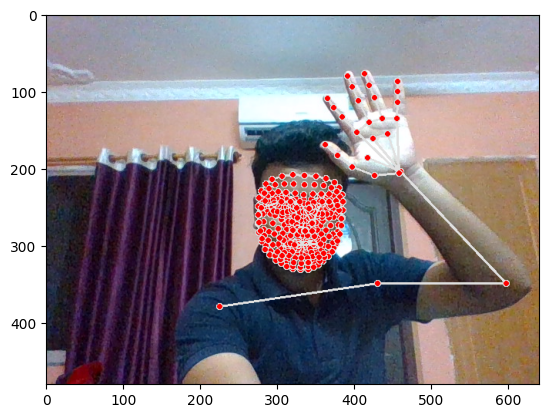

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [15]:
len(results.left_hand_landmarks.landmark)

21

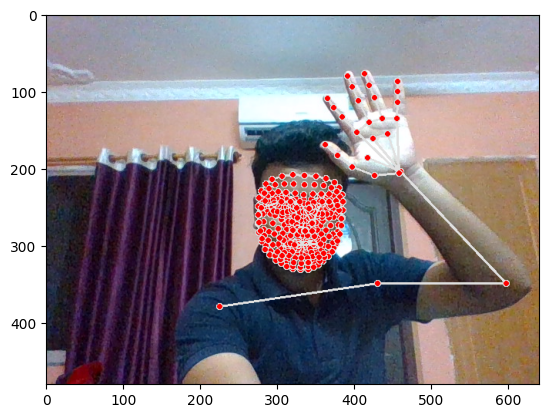

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


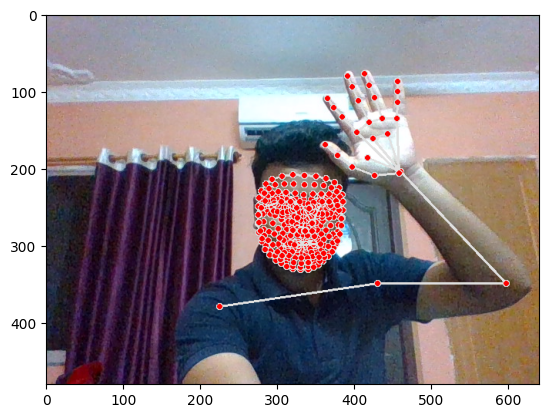

In [17]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

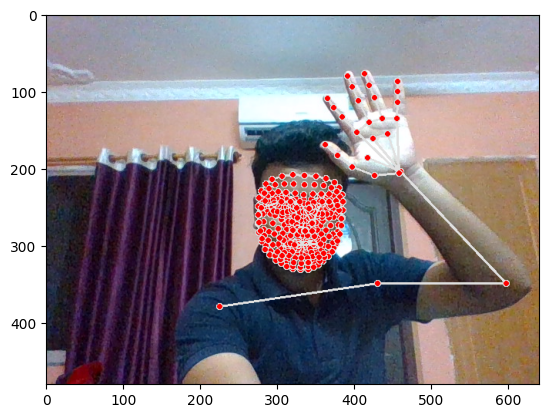

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [19]:
len(results.left_hand_landmarks.landmark)

21

In [20]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [21]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [22]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()  if results.face_landmarks else np.zeros(1404)
   
    

In [23]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
result_test = extract_keypoints(results)

In [25]:
result_test

array([ 0.53995806,  0.56500298, -0.54508674, ...,  0.        ,
        0.        ,  0.        ])

In [26]:
468*3+33*4+21*3+21*3


1662

In [27]:
np.save('0', result_test)

In [28]:
np.load('0.npy')

array([ 0.53995806,  0.56500298, -0.54508674, ...,  0.        ,
        0.        ,  0.        ])

In [29]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [30]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [31]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [32]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [34]:
label_map = {label:num for num, label in enumerate(actions)}

In [35]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [36]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [37]:
np.array(sequences).shape

(90, 30, 1662)

In [38]:
np.array(labels).shape

(90,)

In [39]:
X = np.array(sequences)

In [40]:
X.shape

(90, 30, 1662)

In [41]:
y = to_categorical(labels).astype(int)

In [42]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [44]:
y_test.shape

(5, 3)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [46]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [47]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [48]:
res = [.7, 0.2, 0.1]

In [49]:
actions[np.argmax(res)]

'hello'

In [50]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 254ms/step - loss: 1.8606 - categorical_accuracy: 0.3269
Epoch 2/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.7881 - categorical_accuracy: 0.2858
Epoch 3/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.2082 - categorical_accuracy: 0.3366
Epoch 4/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.0708 - categorical_accuracy: 0.3718
Epoch 5/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0152 - categorical_accuracy: 0.3679
Epoch 6/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.9465 - categorical_accuracy: 0.4677
Epoch 7/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.9371 - categorical_accuracy: 0.6261
Epoch 8/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0161 - categorical_accuracy: 0.5792
Epoch 9/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0337 - categorical_accuracy: 0.3426


3/3 [==============================] - 0s 74ms/step - loss: 0.4715 - categorical_accuracy: 0.9139
Epoch 75/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.3116 - categorical_accuracy: 0.9726
Epoch 76/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.3000 - categorical_accuracy: 0.9804
Epoch 77/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.2663 - categorical_accuracy: 0.9726
Epoch 78/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1418 - categorical_accuracy: 0.9843
Epoch 79/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1290 - categorical_accuracy: 0.9706
Epoch 80/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0968 - categorical_accuracy: 0.9902
Epoch 81/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1047 - categorical_accuracy: 0.9824
Epoch 82/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0799 - categorical_accuracy: 0.9902
Epoch 

3/3 [==============================] - 0s 70ms/step - loss: 0.0126 - categorical_accuracy: 0.9902
Epoch 147/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0079 - categorical_accuracy: 1.0000
Epoch 148/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0145 - categorical_accuracy: 1.0000
Epoch 149/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0089 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0109 - categorical_accuracy: 1.0000
Epoch 151/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0056 - categorical_accuracy: 1.0000
Epoch 152/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0126 - categorical_accuracy: 1.0000
Epoch 153/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0082 - categorical_accuracy: 1.0000
Epoch 154/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0094 - categorical_accuracy: 0.994

3/3 [==============================] - 0s 75ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 221/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 222/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 223/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 224/2000
3/3 [==============================] - 0s 73ms/step - loss: 9.1993e-04 - categorical_accuracy: 1.0000
Epoch 225/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 226/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0011 - categorical_accuracy: 1

3/3 [==============================] - 0s 74ms/step - loss: 2.4582e-04 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.2781e-04 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.1163e-04 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.9047e-04 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.0522e-04 - categorical_accuracy: 1.0000
Epoch 293/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.1620e-04 - categorical_accuracy: 1.0000
Epoch 294/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.0199e-04 - categorical_accuracy: 1.0000
Epoch 295/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.2599e-04 - categorical_accuracy: 1.0000
Epoch 296/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.39

3/3 [==============================] - 0s 75ms/step - loss: 7.9655e-05 - categorical_accuracy: 1.0000
Epoch 359/2000
3/3 [==============================] - 0s 72ms/step - loss: 7.1778e-05 - categorical_accuracy: 1.0000
Epoch 360/2000
3/3 [==============================] - 0s 75ms/step - loss: 6.5860e-05 - categorical_accuracy: 1.0000
Epoch 361/2000
3/3 [==============================] - 0s 73ms/step - loss: 7.4248e-05 - categorical_accuracy: 1.0000
Epoch 362/2000
3/3 [==============================] - 0s 76ms/step - loss: 7.0248e-05 - categorical_accuracy: 1.0000
Epoch 363/2000
3/3 [==============================] - 0s 73ms/step - loss: 7.9146e-05 - categorical_accuracy: 1.0000
Epoch 364/2000
3/3 [==============================] - 0s 77ms/step - loss: 7.5577e-05 - categorical_accuracy: 1.0000
Epoch 365/2000
3/3 [==============================] - 0s 73ms/step - loss: 6.7627e-05 - categorical_accuracy: 1.0000
Epoch 366/2000
3/3 [==============================] - 0s 75ms/step - loss: 6.34

3/3 [==============================] - 0s 76ms/step - loss: 4.8003e-05 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.2675e-05 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.7552e-05 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 77ms/step - loss: 3.4722e-05 - categorical_accuracy: 1.0000
Epoch 432/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.2728e-05 - categorical_accuracy: 1.0000
Epoch 433/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.6737e-05 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.3558e-05 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.8120e-05 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 75ms/step - loss: 4.63

3/3 [==============================] - 0s 73ms/step - loss: 2.2266e-05 - categorical_accuracy: 1.0000
Epoch 499/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.4425e-05 - categorical_accuracy: 1.0000
Epoch 500/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.3724e-05 - categorical_accuracy: 1.0000
Epoch 501/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.3467e-05 - categorical_accuracy: 1.0000
Epoch 502/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.7546e-05 - categorical_accuracy: 1.0000
Epoch 503/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.9089e-05 - categorical_accuracy: 1.0000
Epoch 504/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.0663e-05 - categorical_accuracy: 1.0000
Epoch 505/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.3922e-05 - categorical_accuracy: 1.0000
Epoch 506/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.58

3/3 [==============================] - 0s 77ms/step - loss: 1.5397e-05 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.1785e-05 - categorical_accuracy: 1.0000
Epoch 570/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.5168e-05 - categorical_accuracy: 1.0000
Epoch 571/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.3045e-05 - categorical_accuracy: 1.0000
Epoch 572/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.5145e-05 - categorical_accuracy: 1.0000
Epoch 573/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.6536e-05 - categorical_accuracy: 1.0000
Epoch 574/2000
3/3 [==============================] - 0s 76ms/step - loss: 9.7439e-06 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.1070e-05 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.15

3/3 [==============================] - 0s 76ms/step - loss: 9.7824e-06 - categorical_accuracy: 1.0000
Epoch 639/2000
3/3 [==============================] - 0s 72ms/step - loss: 8.4150e-06 - categorical_accuracy: 1.0000
Epoch 640/2000
3/3 [==============================] - 0s 73ms/step - loss: 7.6698e-06 - categorical_accuracy: 1.0000
Epoch 641/2000
3/3 [==============================] - 0s 74ms/step - loss: 6.5048e-06 - categorical_accuracy: 1.0000
Epoch 642/2000
3/3 [==============================] - 0s 72ms/step - loss: 9.5587e-06 - categorical_accuracy: 1.0000
Epoch 643/2000
3/3 [==============================] - 0s 77ms/step - loss: 8.5812e-06 - categorical_accuracy: 1.0000
Epoch 644/2000
3/3 [==============================] - 0s 74ms/step - loss: 7.6250e-06 - categorical_accuracy: 1.0000
Epoch 645/2000
3/3 [==============================] - 0s 78ms/step - loss: 7.0070e-06 - categorical_accuracy: 1.0000
Epoch 646/2000
3/3 [==============================] - 0s 75ms/step - loss: 7.48

3/3 [==============================] - 0s 75ms/step - loss: 6.6860e-06 - categorical_accuracy: 1.0000
Epoch 709/2000
3/3 [==============================] - 0s 86ms/step - loss: 5.9426e-06 - categorical_accuracy: 1.0000
Epoch 710/2000
3/3 [==============================] - 0s 73ms/step - loss: 5.7008e-06 - categorical_accuracy: 1.0000
Epoch 711/2000
3/3 [==============================] - 0s 78ms/step - loss: 7.4676e-06 - categorical_accuracy: 1.0000
Epoch 712/2000
3/3 [==============================] - 0s 74ms/step - loss: 4.9236e-06 - categorical_accuracy: 1.0000
Epoch 713/2000
3/3 [==============================] - 0s 73ms/step - loss: 6.9414e-06 - categorical_accuracy: 1.0000
Epoch 714/2000
3/3 [==============================] - 0s 74ms/step - loss: 6.8668e-06 - categorical_accuracy: 1.0000
Epoch 715/2000
3/3 [==============================] - 0s 72ms/step - loss: 6.3338e-06 - categorical_accuracy: 1.0000
Epoch 716/2000
3/3 [==============================] - 0s 73ms/step - loss: 5.46

3/3 [==============================] - 0s 77ms/step - loss: 4.6590e-06 - categorical_accuracy: 1.0000
Epoch 779/2000
3/3 [==============================] - 0s 72ms/step - loss: 4.0355e-06 - categorical_accuracy: 1.0000
Epoch 780/2000
3/3 [==============================] - 0s 74ms/step - loss: 4.1523e-06 - categorical_accuracy: 1.0000
Epoch 781/2000
3/3 [==============================] - 0s 75ms/step - loss: 5.1194e-06 - categorical_accuracy: 1.0000
Epoch 782/2000
3/3 [==============================] - 0s 77ms/step - loss: 4.5911e-06 - categorical_accuracy: 1.0000
Epoch 783/2000
3/3 [==============================] - 0s 73ms/step - loss: 4.8257e-06 - categorical_accuracy: 1.0000
Epoch 784/2000
3/3 [==============================] - 0s 76ms/step - loss: 5.0764e-06 - categorical_accuracy: 1.0000
Epoch 785/2000
3/3 [==============================] - 0s 73ms/step - loss: 6.0712e-06 - categorical_accuracy: 1.0000
Epoch 786/2000
3/3 [==============================] - 0s 74ms/step - loss: 4.24

3/3 [==============================] - 0s 78ms/step - loss: 3.8261e-06 - categorical_accuracy: 1.0000
Epoch 849/2000
3/3 [==============================] - 0s 74ms/step - loss: 4.3723e-06 - categorical_accuracy: 1.0000
Epoch 850/2000
3/3 [==============================] - 0s 76ms/step - loss: 4.6261e-06 - categorical_accuracy: 1.0000
Epoch 851/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.9222e-06 - categorical_accuracy: 1.0000
Epoch 852/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.2908e-06 - categorical_accuracy: 1.0000
Epoch 853/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.7296e-06 - categorical_accuracy: 1.0000
Epoch 854/2000
3/3 [==============================] - 0s 72ms/step - loss: 3.5564e-06 - categorical_accuracy: 1.0000
Epoch 855/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.8798e-06 - categorical_accuracy: 1.0000
Epoch 856/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.29

3/3 [==============================] - 0s 78ms/step - loss: 2.6780e-06 - categorical_accuracy: 1.0000
Epoch 919/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.4214e-06 - categorical_accuracy: 1.0000
Epoch 920/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.0013e-06 - categorical_accuracy: 1.0000
Epoch 921/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.7303e-06 - categorical_accuracy: 1.0000
Epoch 922/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.6113e-06 - categorical_accuracy: 1.0000
Epoch 923/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.7780e-06 - categorical_accuracy: 1.0000
Epoch 924/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.7579e-06 - categorical_accuracy: 1.0000
Epoch 925/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.0850e-06 - categorical_accuracy: 1.0000
Epoch 926/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.51

3/3 [==============================] - 0s 76ms/step - loss: 2.3340e-06 - categorical_accuracy: 1.0000
Epoch 989/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.9198e-06 - categorical_accuracy: 1.0000
Epoch 990/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.8847e-06 - categorical_accuracy: 1.0000
Epoch 991/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.1235e-06 - categorical_accuracy: 1.0000
Epoch 992/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.5237e-06 - categorical_accuracy: 1.0000
Epoch 993/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.8765e-06 - categorical_accuracy: 1.0000
Epoch 994/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.9202e-06 - categorical_accuracy: 1.0000
Epoch 995/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.8164e-06 - categorical_accuracy: 1.0000
Epoch 996/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.71

3/3 [==============================] - 0s 75ms/step - loss: 1.8775e-06 - categorical_accuracy: 1.0000
Epoch 1058/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.5106e-06 - categorical_accuracy: 1.0000
Epoch 1059/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.4198e-06 - categorical_accuracy: 1.0000
Epoch 1060/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.4011e-06 - categorical_accuracy: 1.0000
Epoch 1061/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.8214e-06 - categorical_accuracy: 1.0000
Epoch 1062/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.8905e-06 - categorical_accuracy: 1.0000
Epoch 1063/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.0928e-06 - categorical_accuracy: 1.0000
Epoch 1064/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.0549e-06 - categorical_accuracy: 1.0000
Epoch 1065/2000
3/3 [==============================] - 0s 74ms/step - lo

3/3 [==============================] - 0s 84ms/step - loss: 1.2824e-06 - categorical_accuracy: 1.0000
Epoch 1127/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.7341e-06 - categorical_accuracy: 1.0000
Epoch 1128/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.6612e-06 - categorical_accuracy: 1.0000
Epoch 1129/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.2389e-06 - categorical_accuracy: 1.0000
Epoch 1130/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.7161e-06 - categorical_accuracy: 1.0000
Epoch 1131/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.3262e-06 - categorical_accuracy: 1.0000
Epoch 1132/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.8752e-06 - categorical_accuracy: 1.0000
Epoch 1133/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.4898e-06 - categorical_accuracy: 1.0000
Epoch 1134/2000
3/3 [==============================] - 0s 72ms/step - lo

3/3 [==============================] - 0s 74ms/step - loss: 1.6123e-06 - categorical_accuracy: 1.0000
Epoch 1196/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.1545e-06 - categorical_accuracy: 1.0000
Epoch 1197/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.1543e-06 - categorical_accuracy: 1.0000
Epoch 1198/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.3538e-06 - categorical_accuracy: 1.0000
Epoch 1199/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.2595e-06 - categorical_accuracy: 1.0000
Epoch 1200/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.1752e-06 - categorical_accuracy: 1.0000
Epoch 1201/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0863e-06 - categorical_accuracy: 1.0000
Epoch 1202/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0232e-06 - categorical_accuracy: 1.0000
Epoch 1203/2000
3/3 [==============================] - 0s 75ms/step - lo

3/3 [==============================] - 0s 76ms/step - loss: 1.0670e-06 - categorical_accuracy: 1.0000
Epoch 1265/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.1716e-06 - categorical_accuracy: 1.0000
Epoch 1266/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0726e-06 - categorical_accuracy: 1.0000
Epoch 1267/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0970e-06 - categorical_accuracy: 1.0000
Epoch 1268/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.1245e-06 - categorical_accuracy: 1.0000
Epoch 1269/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.2577e-06 - categorical_accuracy: 1.0000
Epoch 1270/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0763e-06 - categorical_accuracy: 1.0000
Epoch 1271/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.3275e-06 - categorical_accuracy: 1.0000
Epoch 1272/2000
3/3 [==============================] - 0s 75ms/step - lo

3/3 [==============================] - 0s 80ms/step - loss: 6.8043e-07 - categorical_accuracy: 1.0000
Epoch 1334/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.1505e-06 - categorical_accuracy: 1.0000
Epoch 1335/2000
3/3 [==============================] - 0s 76ms/step - loss: 6.6296e-07 - categorical_accuracy: 1.0000
Epoch 1336/2000
3/3 [==============================] - 0s 73ms/step - loss: 7.6260e-07 - categorical_accuracy: 1.0000
Epoch 1337/2000
3/3 [==============================] - 0s 76ms/step - loss: 7.0579e-07 - categorical_accuracy: 1.0000
Epoch 1338/2000
3/3 [==============================] - 0s 77ms/step - loss: 8.3641e-07 - categorical_accuracy: 1.0000
Epoch 1339/2000
3/3 [==============================] - 0s 76ms/step - loss: 8.7039e-07 - categorical_accuracy: 1.0000
Epoch 1340/2000
3/3 [==============================] - 0s 76ms/step - loss: 8.6596e-07 - categorical_accuracy: 1.0000
Epoch 1341/2000
3/3 [==============================] - 0s 76ms/step - lo

3/3 [==============================] - 0s 84ms/step - loss: 7.9192e-07 - categorical_accuracy: 1.0000
Epoch 1403/2000
3/3 [==============================] - 0s 112ms/step - loss: 6.2753e-07 - categorical_accuracy: 1.0000
Epoch 1404/2000
3/3 [==============================] - 0s 77ms/step - loss: 7.7749e-07 - categorical_accuracy: 1.0000
Epoch 1405/2000
3/3 [==============================] - 0s 73ms/step - loss: 8.2405e-07 - categorical_accuracy: 1.0000
Epoch 1406/2000
3/3 [==============================] - 0s 75ms/step - loss: 8.8085e-07 - categorical_accuracy: 1.0000
Epoch 1407/2000
3/3 [==============================] - 0s 74ms/step - loss: 7.0157e-07 - categorical_accuracy: 1.0000
Epoch 1408/2000
3/3 [==============================] - 0s 75ms/step - loss: 6.3311e-07 - categorical_accuracy: 1.0000
Epoch 1409/2000
3/3 [==============================] - 0s 77ms/step - loss: 6.9853e-07 - categorical_accuracy: 1.0000
Epoch 1410/2000
3/3 [==============================] - 0s 90ms/step - l

3/3 [==============================] - 0s 77ms/step - loss: 5.4954e-07 - categorical_accuracy: 1.0000
Epoch 1472/2000
3/3 [==============================] - 0s 86ms/step - loss: 5.6025e-07 - categorical_accuracy: 1.0000
Epoch 1473/2000
3/3 [==============================] - 0s 76ms/step - loss: 7.3533e-07 - categorical_accuracy: 1.0000
Epoch 1474/2000
3/3 [==============================] - 0s 77ms/step - loss: 6.3661e-07 - categorical_accuracy: 1.0000
Epoch 1475/2000
3/3 [==============================] - 0s 75ms/step - loss: 5.1181e-07 - categorical_accuracy: 1.0000
Epoch 1476/2000
3/3 [==============================] - 0s 78ms/step - loss: 6.2705e-07 - categorical_accuracy: 1.0000
Epoch 1477/2000
3/3 [==============================] - 0s 73ms/step - loss: 6.9783e-07 - categorical_accuracy: 1.0000
Epoch 1478/2000
3/3 [==============================] - 0s 75ms/step - loss: 7.0947e-07 - categorical_accuracy: 1.0000
Epoch 1479/2000
3/3 [==============================] - 0s 76ms/step - lo

3/3 [==============================] - 0s 75ms/step - loss: 4.6042e-07 - categorical_accuracy: 1.0000
Epoch 1541/2000
3/3 [==============================] - 0s 72ms/step - loss: 5.7054e-07 - categorical_accuracy: 1.0000
Epoch 1542/2000
3/3 [==============================] - 0s 75ms/step - loss: 4.1293e-07 - categorical_accuracy: 1.0000
Epoch 1543/2000
3/3 [==============================] - 0s 74ms/step - loss: 5.4773e-07 - categorical_accuracy: 1.0000
Epoch 1544/2000
3/3 [==============================] - 0s 76ms/step - loss: 4.2688e-07 - categorical_accuracy: 1.0000
Epoch 1545/2000
3/3 [==============================] - 0s 75ms/step - loss: 4.8067e-07 - categorical_accuracy: 1.0000
Epoch 1546/2000
3/3 [==============================] - 0s 77ms/step - loss: 5.9708e-07 - categorical_accuracy: 1.0000
Epoch 1547/2000
3/3 [==============================] - 0s 74ms/step - loss: 5.5051e-07 - categorical_accuracy: 1.0000
Epoch 1548/2000
3/3 [==============================] - 0s 76ms/step - lo

3/3 [==============================] - 0s 78ms/step - loss: 3.9789e-07 - categorical_accuracy: 1.0000
Epoch 1610/2000
3/3 [==============================] - 0s 76ms/step - loss: 4.9753e-07 - categorical_accuracy: 1.0000
Epoch 1611/2000
3/3 [==============================] - 0s 74ms/step - loss: 4.4678e-07 - categorical_accuracy: 1.0000
Epoch 1612/2000
3/3 [==============================] - 0s 75ms/step - loss: 5.4665e-07 - categorical_accuracy: 1.0000
Epoch 1613/2000
3/3 [==============================] - 0s 76ms/step - loss: 4.7518e-07 - categorical_accuracy: 1.0000
Epoch 1614/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.9997e-07 - categorical_accuracy: 1.0000
Epoch 1615/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.9159e-07 - categorical_accuracy: 1.0000
Epoch 1616/2000
3/3 [==============================] - 0s 76ms/step - loss: 4.6911e-07 - categorical_accuracy: 1.0000
Epoch 1617/2000
3/3 [==============================] - 0s 74ms/step - lo

3/3 [==============================] - 0s 74ms/step - loss: 4.8669e-07 - categorical_accuracy: 1.0000
Epoch 1679/2000
3/3 [==============================] - 0s 83ms/step - loss: 4.3850e-07 - categorical_accuracy: 1.0000
Epoch 1680/2000
3/3 [==============================] - 0s 75ms/step - loss: 4.2452e-07 - categorical_accuracy: 1.0000
Epoch 1681/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.7656e-07 - categorical_accuracy: 1.0000
Epoch 1682/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.8937e-07 - categorical_accuracy: 1.0000
Epoch 1683/2000
3/3 [==============================] - 0s 78ms/step - loss: 4.8110e-07 - categorical_accuracy: 1.0000
Epoch 1684/2000
3/3 [==============================] - 0s 74ms/step - loss: 4.0545e-07 - categorical_accuracy: 1.0000
Epoch 1685/2000
3/3 [==============================] - 0s 74ms/step - loss: 4.1219e-07 - categorical_accuracy: 1.0000
Epoch 1686/2000
3/3 [==============================] - 0s 75ms/step - lo

3/3 [==============================] - 0s 76ms/step - loss: 3.6133e-07 - categorical_accuracy: 1.0000
Epoch 1748/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.0428e-07 - categorical_accuracy: 1.0000
Epoch 1749/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.5061e-07 - categorical_accuracy: 1.0000
Epoch 1750/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.9392e-07 - categorical_accuracy: 1.0000
Epoch 1751/2000
3/3 [==============================] - 0s 89ms/step - loss: 2.7774e-07 - categorical_accuracy: 1.0000
Epoch 1752/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.1173e-07 - categorical_accuracy: 1.0000
Epoch 1753/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.2686e-07 - categorical_accuracy: 1.0000
Epoch 1754/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.8402e-07 - categorical_accuracy: 1.0000
Epoch 1755/2000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 77ms/step - loss: 3.5449e-07 - categorical_accuracy: 1.0000
Epoch 1817/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.5937e-07 - categorical_accuracy: 1.0000
Epoch 1818/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.2631e-07 - categorical_accuracy: 1.0000
Epoch 1819/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.7043e-07 - categorical_accuracy: 1.0000
Epoch 1820/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.7276e-07 - categorical_accuracy: 1.0000
Epoch 1821/2000
3/3 [==============================] - 0s 92ms/step - loss: 3.2515e-07 - categorical_accuracy: 1.0000
Epoch 1822/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.7998e-07 - categorical_accuracy: 1.0000
Epoch 1823/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.6693e-07 - categorical_accuracy: 1.0000
Epoch 1824/2000
3/3 [==============================] - 0s 75ms/step - lo

3/3 [==============================] - 0s 75ms/step - loss: 2.8037e-07 - categorical_accuracy: 1.0000
Epoch 1886/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.9224e-07 - categorical_accuracy: 1.0000
Epoch 1887/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.6709e-07 - categorical_accuracy: 1.0000
Epoch 1888/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.8176e-07 - categorical_accuracy: 1.0000
Epoch 1889/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.6989e-07 - categorical_accuracy: 1.0000
Epoch 1890/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.0760e-07 - categorical_accuracy: 1.0000
Epoch 1891/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.8269e-07 - categorical_accuracy: 1.0000
Epoch 1892/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.0236e-07 - categorical_accuracy: 1.0000
Epoch 1893/2000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 76ms/step - loss: 2.3839e-07 - categorical_accuracy: 1.0000
Epoch 1955/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.2955e-07 - categorical_accuracy: 1.0000
Epoch 1956/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.2605e-07 - categorical_accuracy: 1.0000
Epoch 1957/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.8332e-07 - categorical_accuracy: 1.0000
Epoch 1958/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.0719e-07 - categorical_accuracy: 1.0000
Epoch 1959/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.8367e-07 - categorical_accuracy: 1.0000
Epoch 1960/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.5375e-07 - categorical_accuracy: 1.0000
Epoch 1961/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.4281e-07 - categorical_accuracy: 1.0000
Epoch 1962/2000
3/3 [==============================] - 0s 74ms/step - lo

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

In [53]:
res = model.predict(X_test)

In [54]:
actions[np.argmax(res[4])]

'thanks'

In [55]:
actions[np.argmax(y_test[4])]

'thanks'

In [56]:
model.save('action.h5')

In [57]:
model.load_weights('action.h5')

In [58]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [59]:
yhat = model.predict(X_test)

In [60]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [61]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[1, 0],
        [0, 4]]], dtype=int64)

In [62]:
accuracy_score(ytrue, yhat)

1.0

In [63]:
accuracy_score(ytrue, yhat)

1.0

In [64]:
from scipy import stats

In [65]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

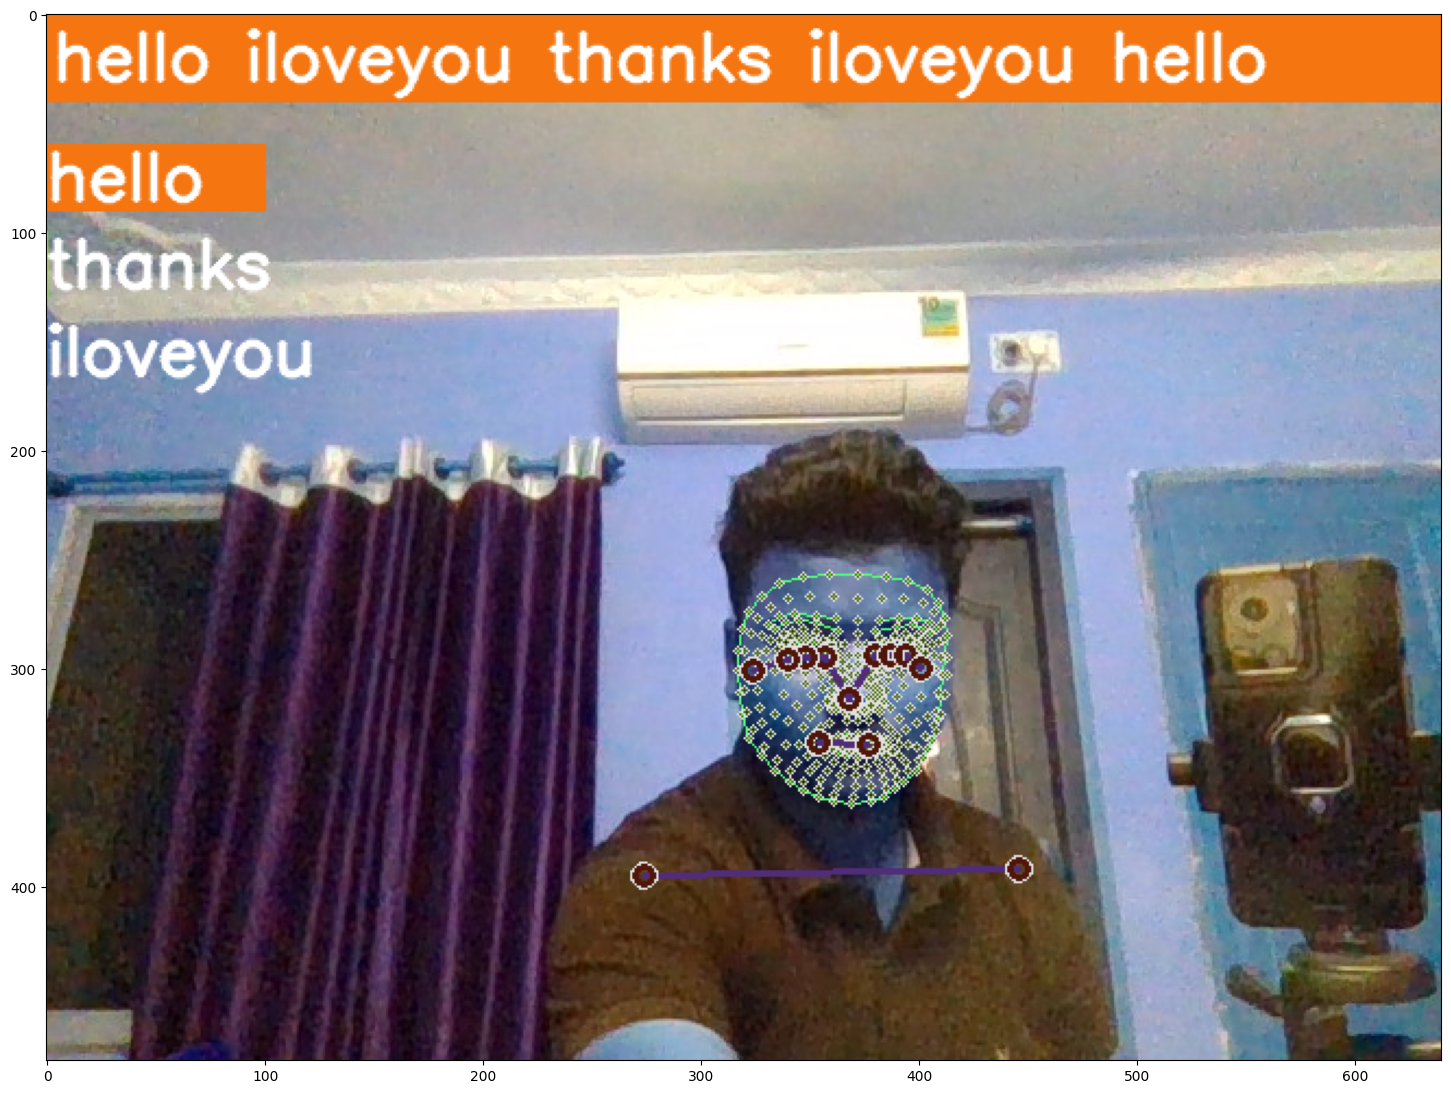

In [70]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [91]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            detected_action = actions[np.argmax(res)]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
            
        #3. text to speech Conversion
        
            

               # Initialize the TTS engine
            engine = pyttsx3.init()
            
            
           

               # Convert the detected action to speech
            engine.say(detected_action)
            engine.runAndWait()
                
               
                
                    
                # Set speech rate
            engine.setProperty('rate', 150)  # Speed of speech

                 # Set volume level (0.0 to 1.0)
            engine.setProperty('volume', 1.0)  

                 # Optionally, choose a different voice (male/female)
            voices = engine.getProperty('voices')
            engine.setProperty('voice', voices[0].id)  # 0 for male, 1 for female
            
            
            
         #3. English to Bengali Conversion
             
            # Initialize the Translator
            translator = Translator()


            # Translate the detected action to Bengali
            translated_action = translator.translate(detected_action, dest='bn').text

            print("Detected Action in Bengali:", translated_action)
            


            
            
        #4. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
            cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti